# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

In this project, I tried to make an analysis of USD/IDR price chart. Tha analysis can be used to get an insight about USD/IDr price action and the right times to buy or sell USD to IDR.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:999]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n<link rel="dns-prefetch" href="https://ajax.googleapis.com/" />\r\n<link rel="dns-prefetch" href="https://www.google-analytics.com/" />\r\n<link rel="preload" href="https://dol8qrceshfrq.cloud

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microso


In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/5/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-5-2021">
     14,292.17893
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-5-2021">
     USD IDR rate for 3/5/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3


In [6]:
tr = table.find_all('tr')
tr[:3]

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
row= table.find_all('tr')[3]
row

<tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>

In [8]:
for i in range(1, len(tr)):
    row = table.find_all('td')[i]
print(row)

<td><a href="/Rate/USD/IDR/1-19-2021">14,063.60877</a> IDR</td>


In [26]:
currency = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]

    if len(row)!=1:
        #get date
        date = row.find_all('td')[0].text
        date = date.strip()
        #get day
        day = row.find_all('td')[1].text
        day = day.strip()
        #get price
        price = row.find_all('td')[2].text
        price = price.strip()
    
    currency.append((date,day,price))
    
currency

[('3/4/2021', 'Thursday', '14,261.85426 IDR'),
 ('3/3/2021', 'Wednesday', '14,257.29443 IDR'),
 ('3/2/2021', 'Tuesday', '14,256.28041 IDR'),
 ('3/1/2021', 'Monday', '14,248.60576 IDR'),
 ('2/26/2021', 'Friday', '14,300.27815 IDR'),
 ('2/25/2021', 'Thursday', '14,139.73096 IDR'),
 ('2/24/2021', 'Wednesday', '14,083.03673 IDR'),
 ('2/23/2021', 'Tuesday', '14,092.64503 IDR'),
 ('2/22/2021', 'Monday', '14,118.07274 IDR'),
 ('2/19/2021', 'Friday', '14,066.79375 IDR'),
 ('2/18/2021', 'Thursday', '14,013.51318 IDR'),
 ('2/18/2021', 'Thursday', '14,013.51318 IDR'),
 ('2/17/2021', 'Wednesday', '14,015.16095 IDR'),
 ('2/16/2021', 'Tuesday', '13,935.96629 IDR'),
 ('2/15/2021', 'Monday', '13,918.18725 IDR'),
 ('2/12/2021', 'Friday', '13,988.54710 IDR'),
 ('2/11/2021', 'Thursday', '13,982.27900 IDR'),
 ('2/10/2021', 'Wednesday', '13,994.09212 IDR'),
 ('2/9/2021', 'Tuesday', '13,920.52018 IDR'),
 ('2/8/2021', 'Monday', '14,007.25257 IDR'),
 ('2/5/2021', 'Friday', '14,008.99630 IDR'),
 ('2/4/2021', '

## Creating data frame & Data wrangling

Put the array into dataframe

In [27]:
import pandas as pd

df = pd.DataFrame(currency, columns = ('Date','Day','Price USD/IDR'))
df.head()

,Date,Day,Price USD/IDR
0,3/4/2021,Thursday,"14,261.85426 IDR"
1,3/3/2021,Wednesday,"14,257.29443 IDR"
2,3/2/2021,Tuesday,"14,256.28041 IDR"
3,3/1/2021,Monday,"14,248.60576 IDR"
4,2/26/2021,Friday,"14,300.27815 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Day'].astype('category')
df.head()

,Date,Day,Price USD/IDR
0,2021-03-04,Thursday,"14,261.85426 IDR"
1,2021-03-03,Wednesday,"14,257.29443 IDR"
2,2021-03-02,Tuesday,"14,256.28041 IDR"
3,2021-03-01,Monday,"14,248.60576 IDR"
4,2021-02-26,Friday,"14,300.27815 IDR"


In [16]:
df['Price USD/IDR'] = df['Price USD/IDR'].str.replace(',', '')
df['Price USD/IDR'] = df['Price USD/IDR'].str.replace(' IDR', '')
df['Price USD/IDR'] = df['Price USD/IDR'].astype('float64')

In [17]:
df['Day']
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['Day'] = df['Day'].cat.reorder_categories(order)

In [18]:
df.head()

,Date,Day,Price USD/IDR
0,2021-03-04,Thursday,14261.85426
1,2021-03-03,Wednesday,14257.29443
2,2021-03-02,Tuesday,14256.28041
3,2021-03-01,Monday,14248.60576
4,2021-02-26,Friday,14300.27815


In [19]:
df = df[::-1]
df

,Date,Day,Price USD/IDR
134,2020-09-06,Sunday,14754.95155
133,2020-09-07,Monday,14743.92989
132,2020-09-08,Tuesday,14839.54267
131,2020-09-09,Wednesday,14783.50009
130,2020-09-10,Thursday,14871.58664
...,...,...,...
4,2021-02-26,Friday,14300.27815
3,2021-03-01,Monday,14248.60576
2,2021-03-02,Tuesday,14256.28041
1,2021-03-03,Wednesday,14257.29443


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [20]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\envs\capstone-da\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


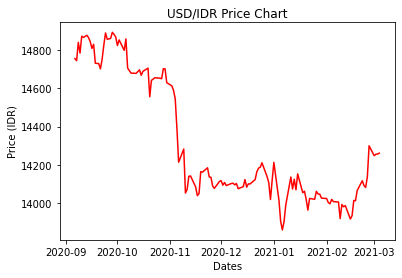

In [22]:
plt.plot(df['Date'],df['Price USD/IDR'], color='red')
plt.title('USD/IDR Price Chart')
plt.xlabel('Dates')
plt.ylabel('Price (IDR)')
plt.show()

As it shown above, the USD/IDR price tends to get lower for the past 6 months 

**We want to know the day where USD/IDR price tends to be low and high**

In [23]:
df.groupby('Day').mean()[['Price USD/IDR']]

,Price USD/IDR
Day,
Sunday,14805.057635
Monday,14310.183738
Tuesday,14300.969863
Wednesday,14296.884792
Thursday,14294.593233
Friday,14312.461582


As it shown above from the table, we know that Tuesday is the best time to buy USD and Sunday is the best time to sell USD


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.